In [282]:
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


In [283]:
df1 = pd.read_csv(os.path.join(dirname, filename))

In [284]:
#df_raw = pd.read_csv(os.path.join(dirname, filename))

# Dataset Info

In [285]:
#22 variables in total where 21 are input/independant and Life_Expectancy is the target/dependant variable
print(f"no of columns : {len(df1.columns)} \nshape of dataset{df1.shape}")

no of columns : 22 
shape of dataset(2938, 22)


In [286]:
df1.select_dtypes(include = 'object').columns

Index(['Country', 'Status'], dtype='object')

In [287]:
df1.select_dtypes(exclude = 'object').columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [288]:
#editing column names
df1.rename(columns = {'Year':'year','Life expectancy ':'life_expectancy','Adult Mortality':'adult_mortality',
                      'infant deaths':'infant_deaths','Alcohol':'alcohol','percentage expenditure':'per_exp',
                      'Hepatitis B': 'hep_b','Measles ':'measles',' BMI ':'bmi',
                      'under-five deaths ':'under_5_deaths','Polio':'polio','Total expenditure':'total_exp',
                      'Diphtheria ':'diphtheria',' HIV/AIDS':'aids','GDP':'gdp','Population':'pop',
                      ' thinness  1-19 years':'thin_1_19_yrs',' thinness 5-9 years':'thin_5_9_yrs',
                      'Income composition of resources':'income_comp_resource','Schooling':'schooling',
                      'Country':'country', 'Status':'status'},inplace = True)

In [289]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               2938 non-null   object 
 1   year                  2938 non-null   int64  
 2   status                2938 non-null   object 
 3   life_expectancy       2928 non-null   float64
 4   adult_mortality       2928 non-null   float64
 5   infant_deaths         2938 non-null   int64  
 6   alcohol               2744 non-null   float64
 7   per_exp               2938 non-null   float64
 8   hep_b                 2385 non-null   float64
 9   measles               2938 non-null   int64  
 10  bmi                   2904 non-null   float64
 11  under_5_deaths        2938 non-null   int64  
 12  polio                 2919 non-null   float64
 13  total_exp             2712 non-null   float64
 14  diphtheria            2919 non-null   float64
 15  aids                 

In [290]:
df1.isnull().sum()

country                   0
year                      0
status                    0
life_expectancy          10
adult_mortality          10
infant_deaths             0
alcohol                 194
per_exp                   0
hep_b                   553
measles                   0
bmi                      34
under_5_deaths            0
polio                    19
total_exp               226
diphtheria               19
aids                      0
gdp                     448
pop                     652
thin_1_19_yrs            34
thin_5_9_yrs             34
income_comp_resource    167
schooling               163
dtype: int64

# Exploratory Data Analysis

<Axes: xlabel='year', ylabel='life_expectancy'>

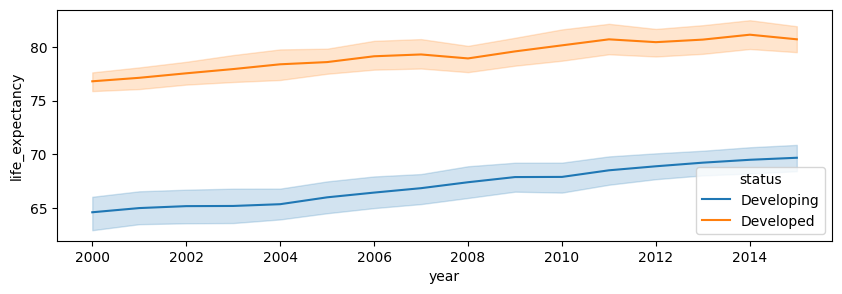

In [291]:
#lineplot of yaer vs life expectancy with respecct to status
plt.figure(figsize = (10,3))
sns.lineplot(df1,x = 'year', y = 'life_expectancy',hue = 'status')

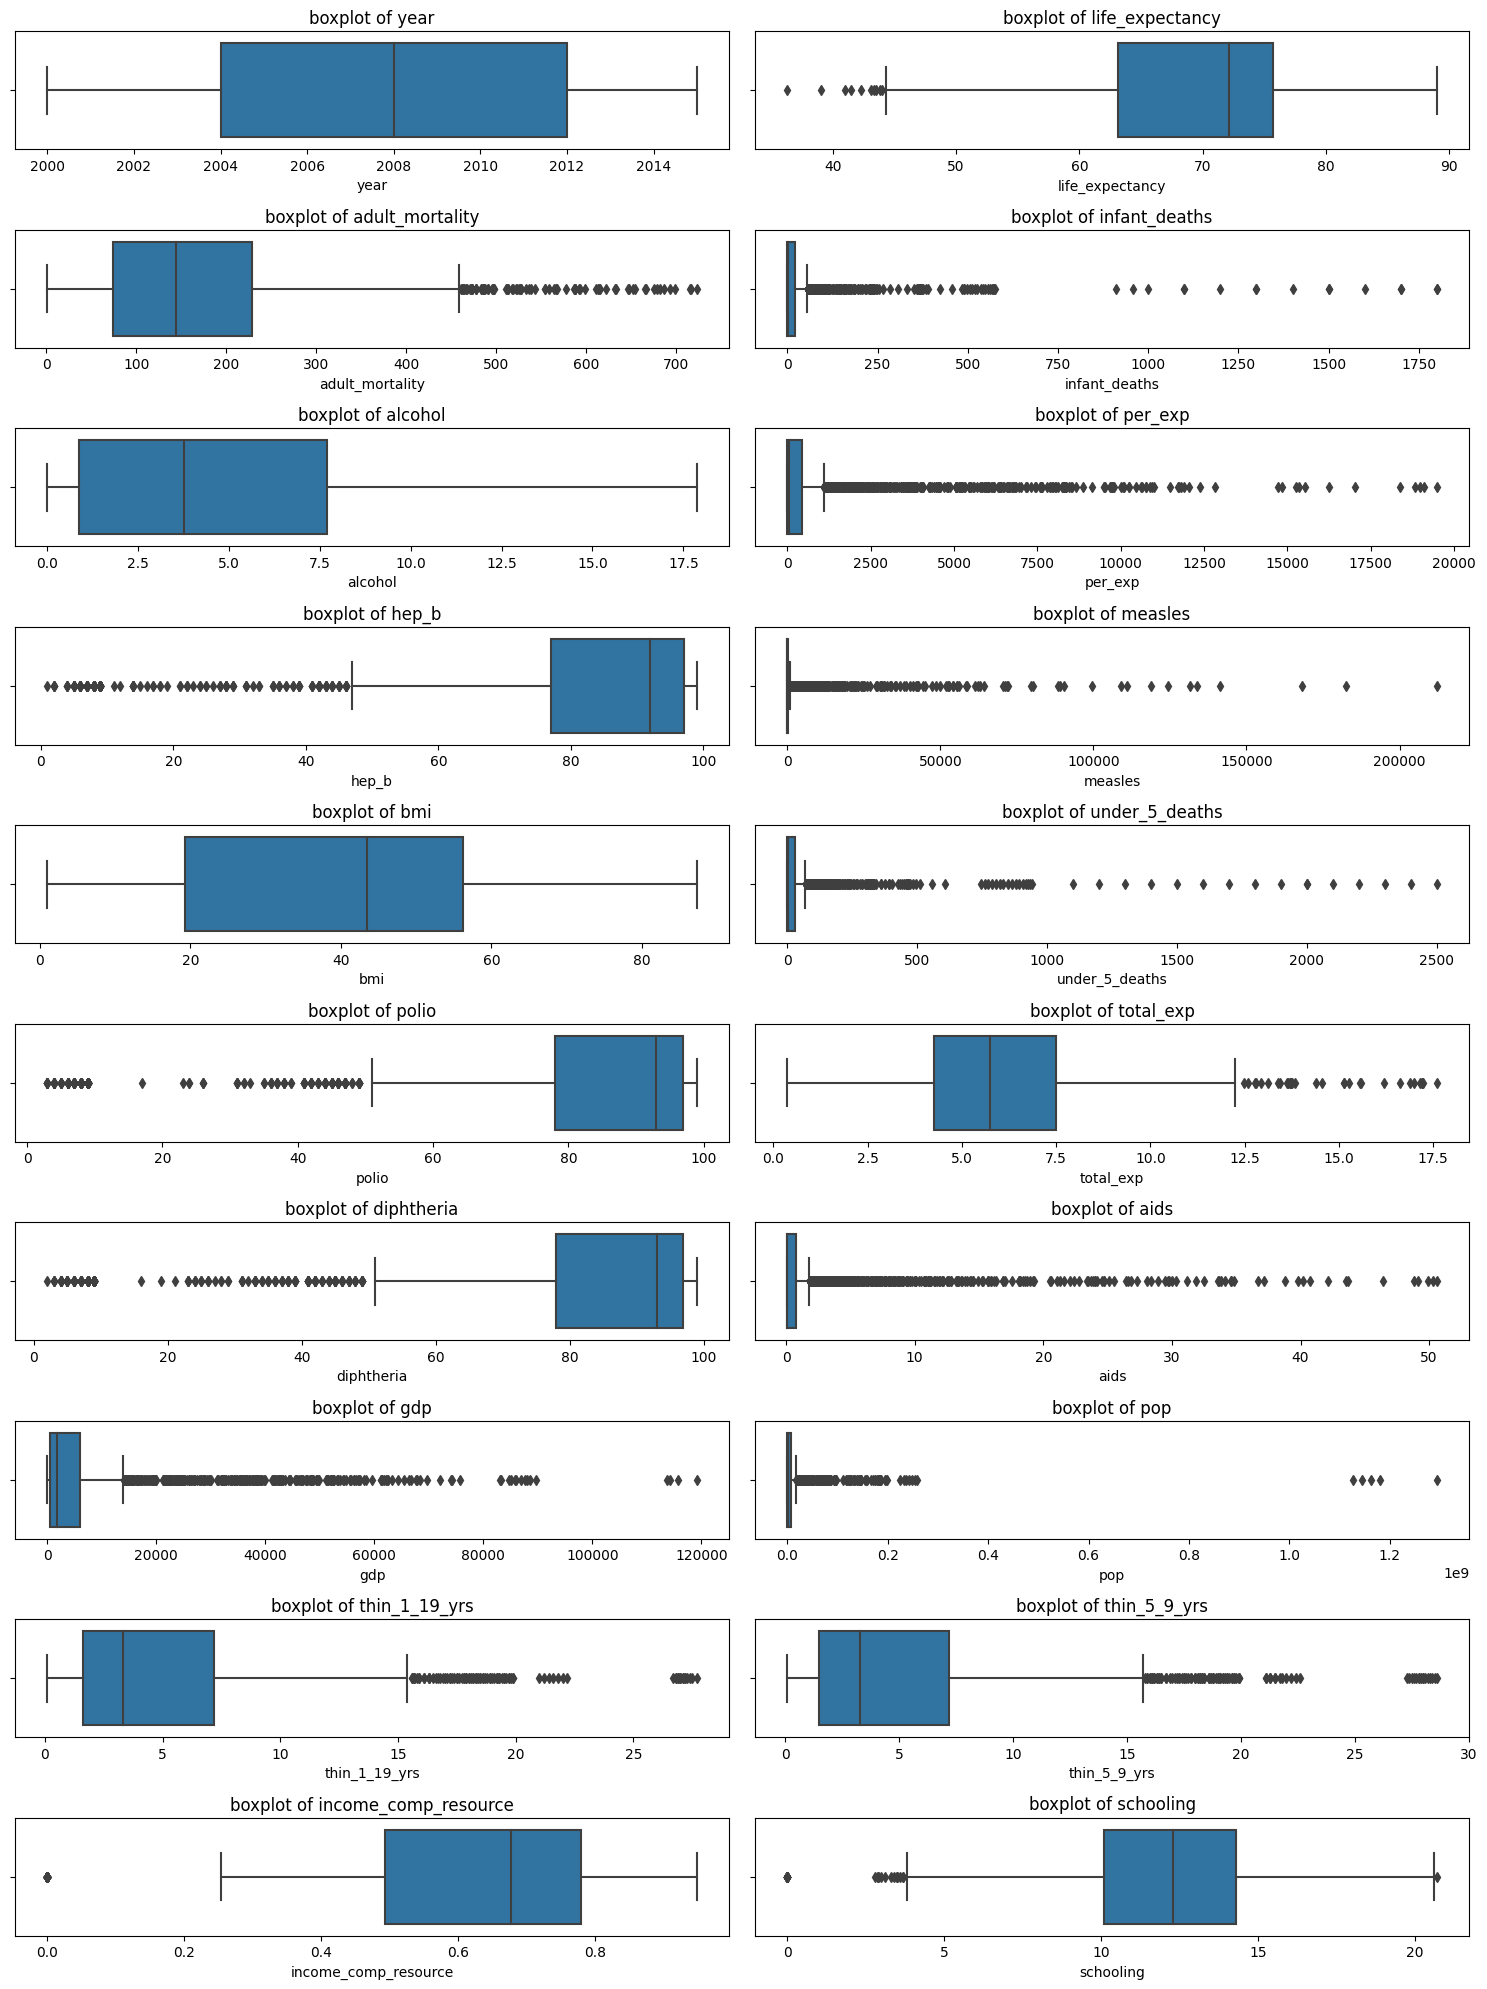

In [292]:
#boxplot of all the numeric columns
df1_numerical = df1.select_dtypes(exclude = 'object')
plt.figure(figsize=(15,20))
for i in range(len(df1_numerical.columns)):
    plt.subplot(10,2,i+1)
    plt.title(f"boxplot of {df1_numerical.columns[i]}")
    sns.boxplot(df1_numerical,x = df1_numerical.columns[i])
plt.tight_layout()
plt.show()

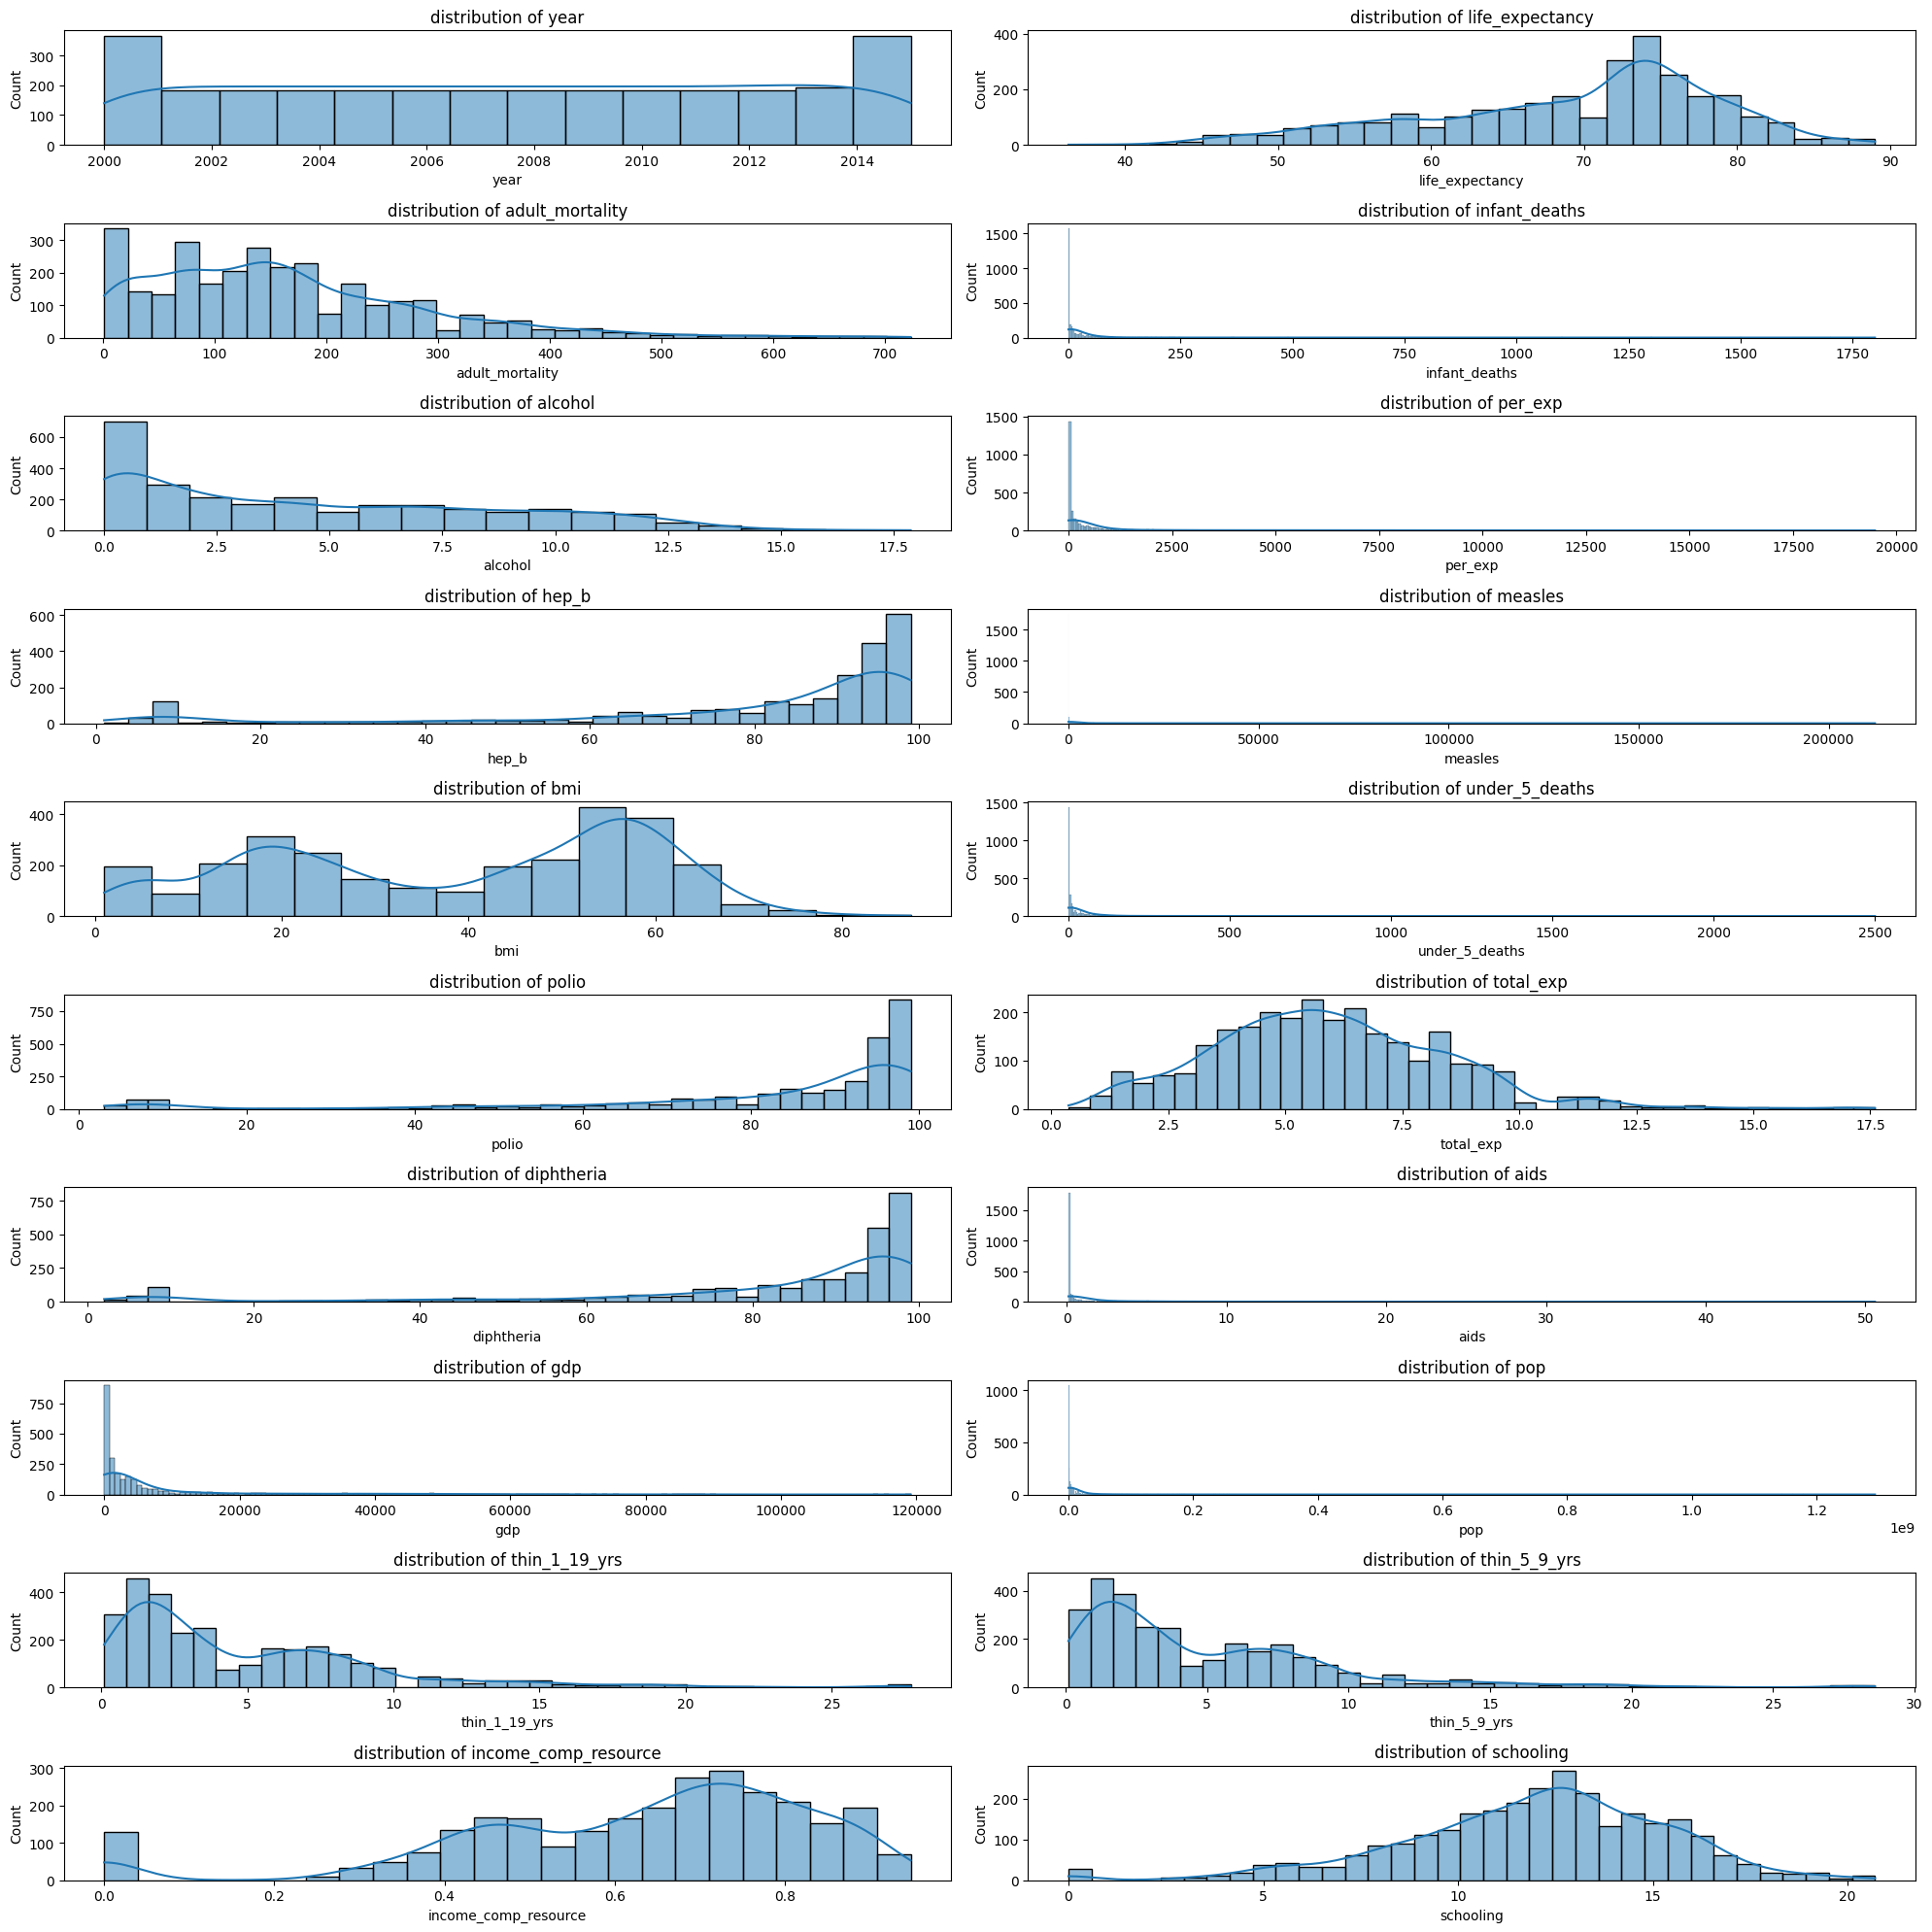

In [293]:
#distribution of all the numeric variables
plt.figure(figsize = (20,20))
for i in range(len(df1_numerical.columns)):
    plt.subplot(10,2,i+1)
    plt.title(f"distribution of {df1_numerical.columns[i]}")
    sns.histplot(df1_numerical,x = df1_numerical.columns[i], kde =True)
plt.tight_layout()
plt.show()

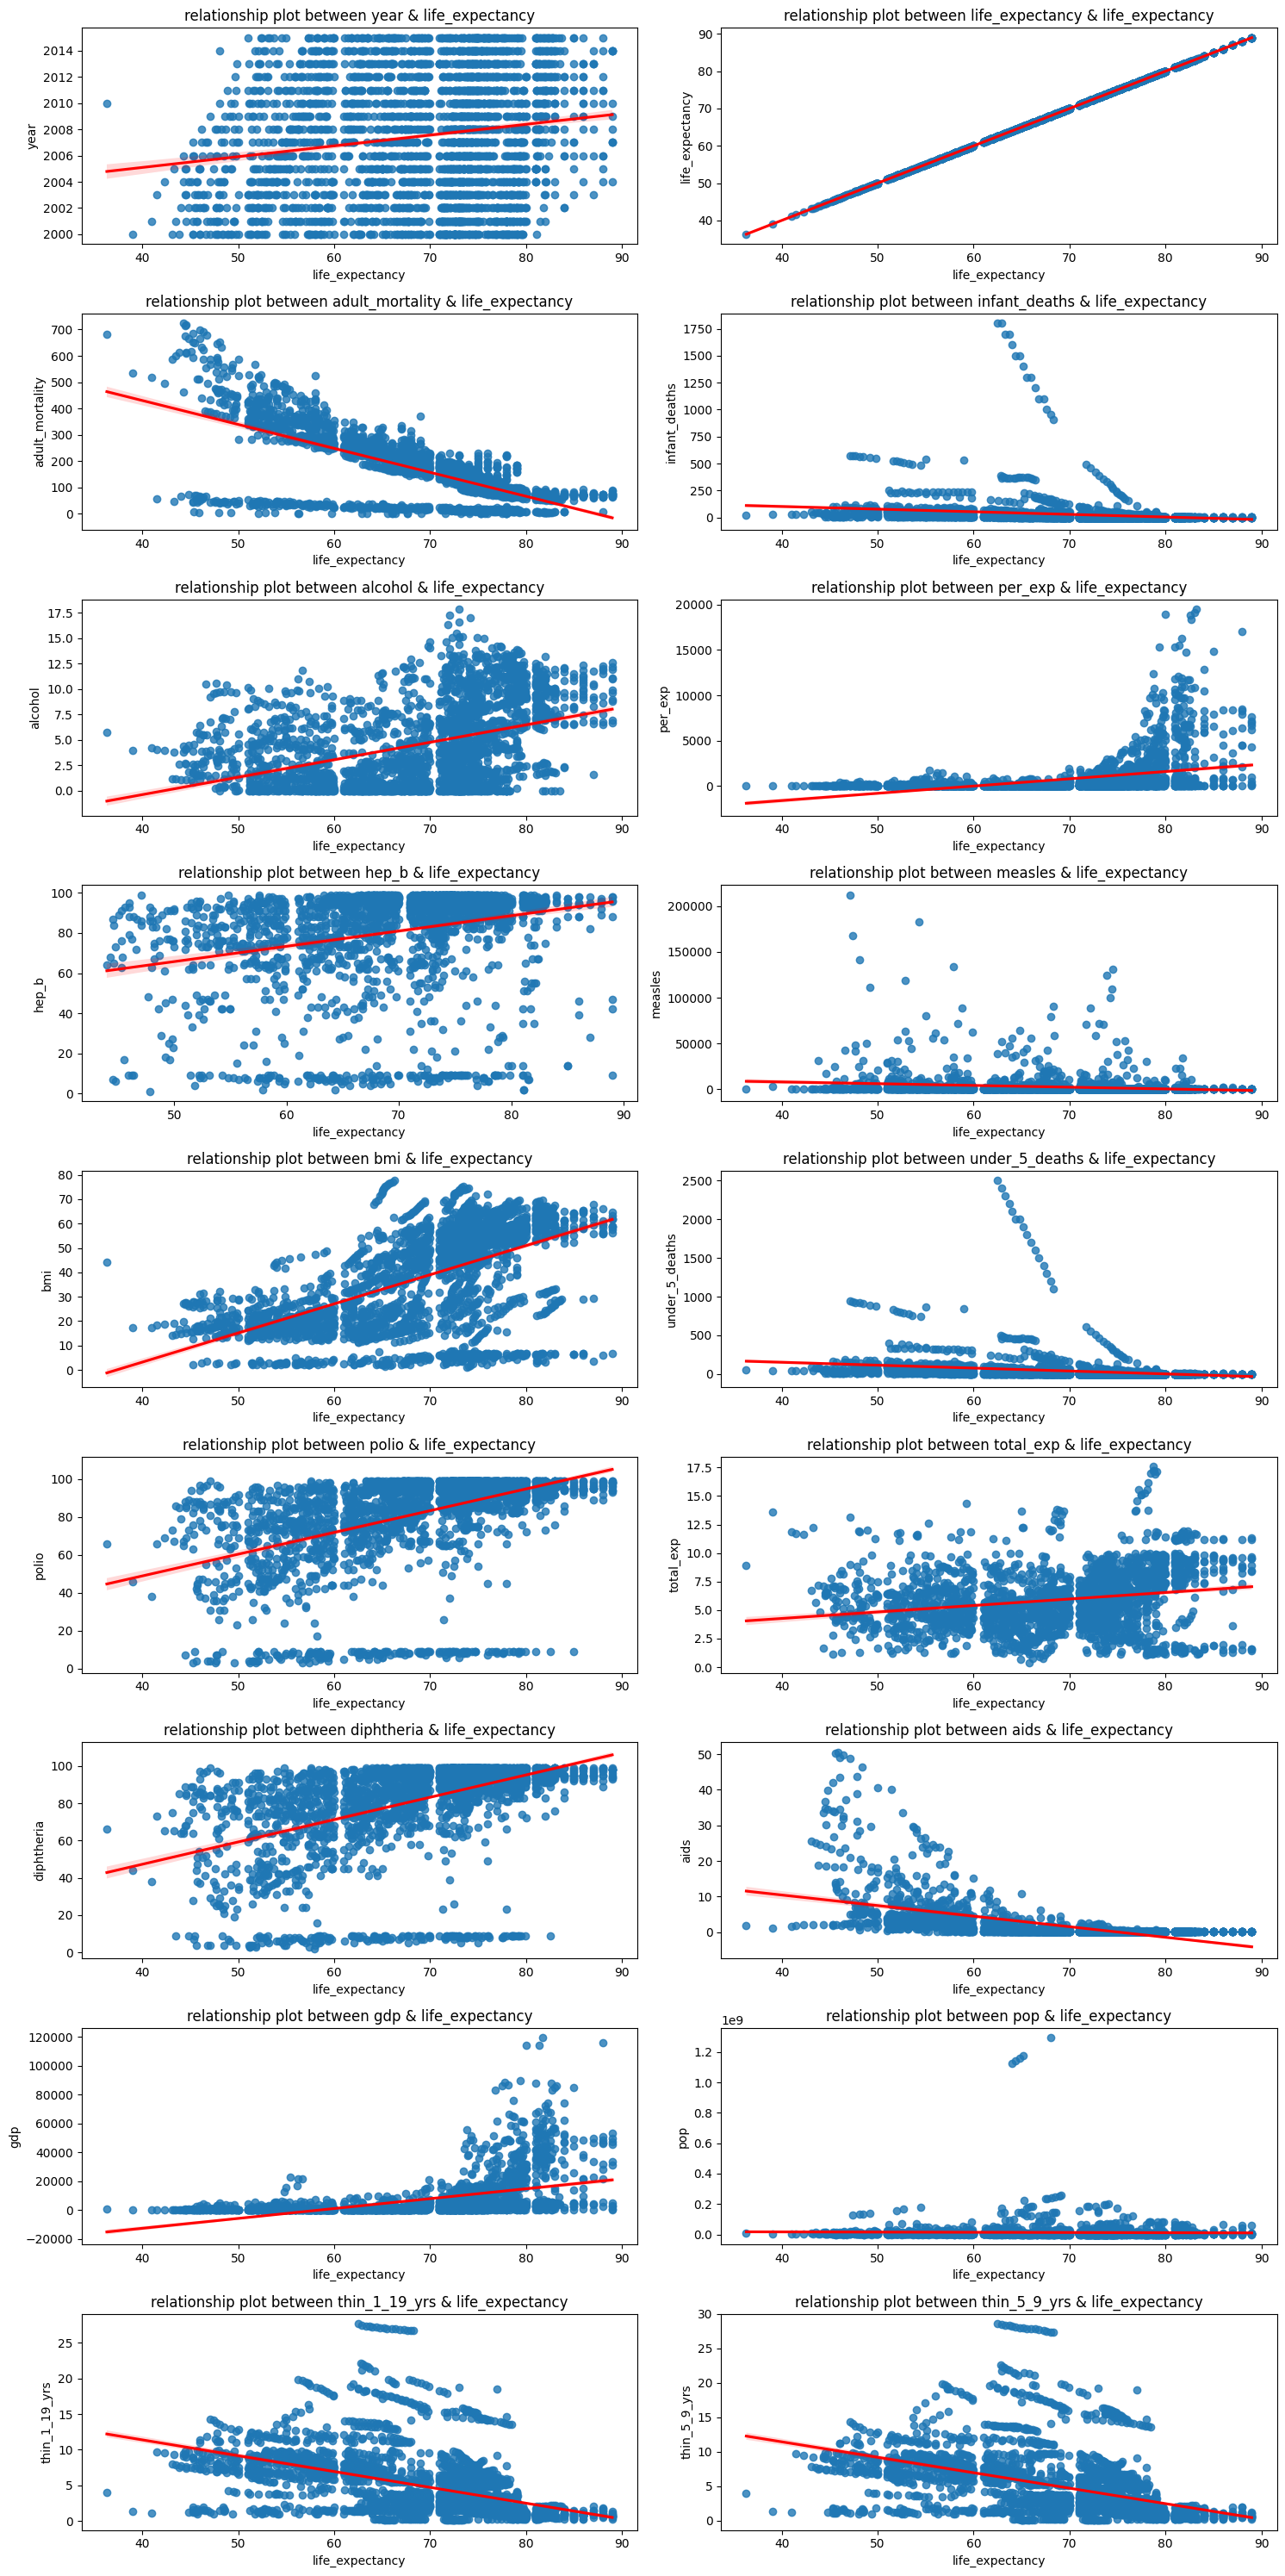

In [294]:
plt.figure(figsize=(15,30))
for i in range(len(df1_numerical.columns)):
    if (i+1 == 19):
        break
    else:
        plt.subplot(9,2,i+1)
        plt.title(f"relationship plot between {df1_numerical.columns[i]} & life_expectancy")
        sns.regplot(df1_numerical,y = df1_numerical.columns[i], x = 'life_expectancy', line_kws = {'color' : 'r'})
plt.tight_layout()
plt.show()

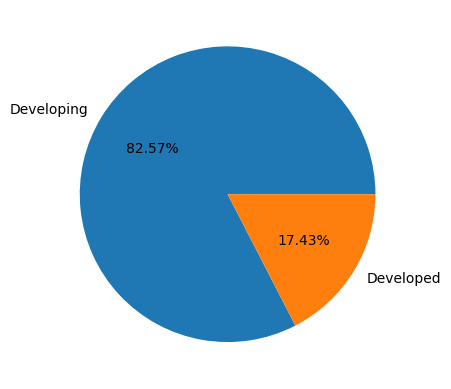

In [295]:
#pie plot of Developing and Developed countries.
plt.pie(x = df1['status'].value_counts(),labels=df1['status'].unique(), autopct = '%.2f%%')
plt.show()

# Outlier Treatment

In [296]:
def outliers(dfx,target):

    df_num=dfx.select_dtypes(exclude = 'object')
    df_num.drop(columns = ['life_expectancy'],axis = 1)
    list2=list(df1.columns).pop(list(df1.columns).index(target))
    list1= []
    for i in df_num.columns:
        q1 = np.nanquantile(dfx[i],0.25)
        q3 = np.nanquantile(dfx[i],0.75)
        iqr = q3-q1
        upper_lim = q1 - 1.5*(iqr)
        lower_lim = q3 + 1.5*(iqr)
        count = 0
        list1.append([i,len(dfx[(dfx[i]>lower_lim) | (dfx[i]<upper_lim)]),f"{round((len(dfx[(dfx[i]>lower_lim) | (dfx[i]<upper_lim)]))/len(df1),1)}%"])
    dfy = pd.DataFrame(list1,columns =['Columns','Outliers','Percent outliers'])    
    
    return dfy

In [297]:
#count of outliers and % of outliers in the data. 
outliers(df1,'life_expectancy')

,Columns,Outliers,Percent outliers
0,year,0,0.0%
1,life_expectancy,10,0.0%
2,adult_mortality,82,0.0%
3,infant_deaths,315,0.1%
4,alcohol,0,0.0%
5,per_exp,389,0.1%
6,hep_b,254,0.1%
7,measles,542,0.2%
8,bmi,0,0.0%
9,under_5_deaths,394,0.1%


# Null Value Treatment

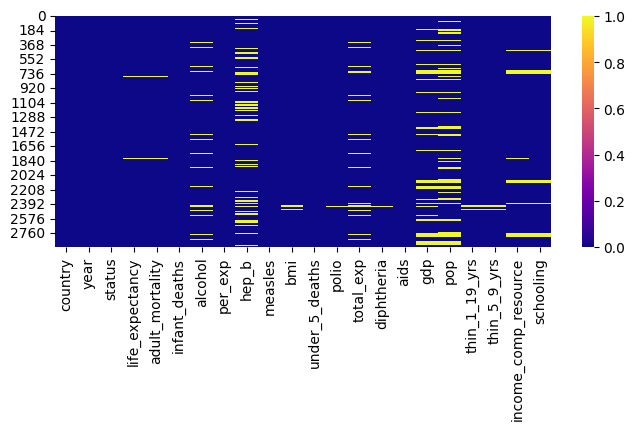

In [298]:
#visual representation of missing values in the dataset
plt.figure(figsize=(8,3))
sns.heatmap(df1.isnull(), cmap = 'plasma')
plt.show()

In [299]:
# Duplicates in the dataset
df1.duplicated().sum()

0

In [300]:
#removing the test_data from the training dataset
df1.drop(index = df1[df1['life_expectancy'].isnull()].index, inplace=True)

In [301]:
#function to find count and percentage null values in the dataset
def null_values(dfx):
    null_val_dict = {}
    for i in range(len(dfx.isnull().sum())):
        null_val_dict[dfx.columns[i]] = dfx.isnull().sum()[i]
    
    keys_to_del = []
    
    for i in null_val_dict.keys():
        if null_val_dict[i] == 0:
            keys_to_del.append(i)
        
    for i in keys_to_del:
        null_val_dict.pop(i)
    
    df_null= pd.DataFrame({"col_name":null_val_dict.keys(),"null_values":null_val_dict.values(),'percent_null':[f"{round((i/len(dfx))*100,0)}%" for i in null_val_dict.values()]})
    
    return df_null

In [302]:
null_values(df1)

,col_name,null_values,percent_null
0,alcohol,193,7.0%
1,hep_b,553,19.0%
2,bmi,32,1.0%
3,polio,19,1.0%
4,total_exp,226,8.0%
5,diphtheria,19,1.0%
6,gdp,443,15.0%
7,pop,644,22.0%
8,thin_1_19_yrs,32,1.0%
9,thin_5_9_yrs,32,1.0%


# Standardization

In [303]:
df_num = df1.select_dtypes(exclude = 'object')
df_cat = df1.select_dtypes(include = 'object')

# Standard Scaling

In [304]:
from sklearn.preprocessing import StandardScaler as ss

scaled_df_num=pd.DataFrame(ss().fit_transform(df_num),columns = df_num.columns)

In [305]:
scaled_df_num

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,per_exp,hep_b,measles,bmi,under_5_deaths,polio,total_exp,diphtheria,aids,gdp,pop,thin_1_19_yrs,thin_5_9_yrs,income_comp_resource,schooling
0,1.626978,-0.443691,0.790238,0.267520,-1.136999,-0.336102,-0.638100,-0.110924,-0.958872,0.254061,-3.269528,0.898109,-0.730782,-0.324055,-0.483911,0.343666,2.793935,2.754279,-0.703606,-0.567762
1,1.410048,-0.979279,0.854614,0.284455,-1.136999,-0.334975,-0.758037,-0.168570,-0.983927,0.272732,-1.048506,0.906164,-0.857351,-0.324055,-0.481920,-0.203803,2.861808,2.798637,-0.717829,-0.597650
2,1.193118,-0.979279,0.830473,0.301391,-1.136999,-0.335128,-0.678079,-0.173968,-1.008982,0.291403,-0.877658,0.886026,-0.772972,-0.324055,-0.480586,0.310813,2.907056,2.842994,-0.746273,-0.627538
3,0.976187,-1.021286,0.862660,0.326794,-1.136999,-0.332633,-0.558142,0.031273,-1.034037,0.316299,-0.664098,1.043106,-0.646403,-0.324055,-0.477910,-0.148590,2.952304,2.909530,-0.779457,-0.657426
4,0.759257,-1.052791,0.886801,0.343730,-1.136999,-0.368345,-0.518163,0.050953,-1.054081,0.341194,-0.621386,0.781306,-0.604214,-0.324055,-0.520378,-0.160361,3.020176,2.953887,-0.822124,-0.747089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,-0.759257,-2.617549,4.491830,-0.028854,-0.062927,-0.371910,-0.518163,-0.208712,-0.557993,-0.001116,-0.664098,0.483257,-0.730782,6.264372,-0.493008,0.000213,1.029256,1.002162,-1.044936,-0.836753
2924,-0.976187,-2.596545,4.427455,-0.037321,-0.137001,-0.371910,-2.956888,-0.124508,-0.578037,-0.007340,-3.226816,0.237568,-0.604214,6.874047,-0.493079,-0.002141,1.119752,1.113055,-0.992788,-0.747089
2925,-1.193118,-2.565040,-0.738680,-0.045789,-0.045643,-0.371910,-0.318267,-0.184940,-0.598081,-0.013564,-0.407826,0.241596,-0.477645,7.483722,-0.520811,-0.207115,-0.825920,-0.794313,-0.950122,-0.597650
2926,-1.410048,-2.512532,4.194093,-0.045789,-0.714778,-0.371910,-0.198330,-0.165348,-0.618125,-0.019787,-0.279691,0.092571,-0.308887,7.936062,-0.486409,-0.006528,-0.735424,-0.705598,-0.950122,-0.657426


# Missing Value Treatment

In [306]:
len(scaled_df_num.columns)

20

In [307]:
from sklearn.impute import KNNImputer as knnimp

#imputer = knnimp(n_neighbors = len(scaled_df_num.columns))
dfx_imputed = pd.DataFrame(knnimp(n_neighbors = 11).fit_transform(scaled_df_num), columns =df_num.columns )

In [308]:
##all the null values in dfx_imputed has been removed
dfx_imputed.isnull().sum()

year                    0
life_expectancy         0
adult_mortality         0
infant_deaths           0
alcohol                 0
per_exp                 0
hep_b                   0
measles                 0
bmi                     0
under_5_deaths          0
polio                   0
total_exp               0
diphtheria              0
aids                    0
gdp                     0
pop                     0
thin_1_19_yrs           0
thin_5_9_yrs            0
income_comp_resource    0
schooling               0
dtype: int64

In [309]:
df_cat.drop(columns = ['country'],axis =1, inplace=True)

In [310]:
#encoding status 
df_cat['status'] = df_cat['status'].apply(lambda x: 1 if  x=='Developed' else 0)

In [311]:
#compiling all input variables
xy = pd.concat([dfx_imputed,df_cat],axis = 1)

In [312]:
xy.isnull().sum()

year                    10
life_expectancy         10
adult_mortality         10
infant_deaths           10
alcohol                 10
per_exp                 10
hep_b                   10
measles                 10
bmi                     10
under_5_deaths          10
polio                   10
total_exp               10
diphtheria              10
aids                    10
gdp                     10
pop                     10
thin_1_19_yrs           10
thin_5_9_yrs            10
income_comp_resource    10
schooling               10
status                  10
dtype: int64

In [313]:
#droppinf 10 null values in status
xy =xy.dropna()

In [314]:
#target variable
y = xy['life_expectancy']

In [315]:
#removing target variable from the input variable
xy.drop(columns = ['life_expectancy'],axis = 1,inplace =True)

# Correlation Treatment

In [316]:
x_corr = x.drop(columns = ['status'])

<Axes: >

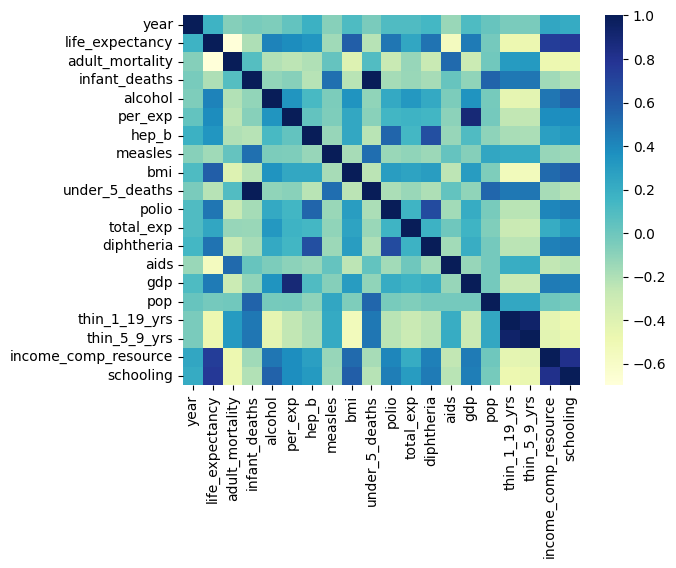

In [317]:
sns.heatmap(x_corr.corr(),cmap = 'YlGnBu')

In [318]:
#A function to find out highly corr vars and make a dict of the vars
def high_corr_fx(dfx,corr,target):
    df_corr= dfx.select_dtypes(exclude = "object")
    dict_corr= {}
    dict_pop=[]
    
    
    for i in df_corr.columns:
        dict_corr[i] = []
    
    
    for i in df_corr.columns:
        for j in df_corr.columns:
            if (i == j) or (i == target) or (j == target):
                pass
            else:
                if(abs(df1[i].corr(df1[j])) >= corr):
                    if((i not in dict_corr[j]) and (j not in dict_corr[i])):
                        dict_corr[i].append(j)
                    else:
                        pass
                else:
                    pass
    
    
    for i in dict_corr.keys():
        if (len(dict_corr[i]) == 0):
            dict_pop.append(i)
        else:
            pass
        
    for i in dict_pop:
        dict_corr.pop(i)
    
    
    return dict_corr

In [319]:
#columns with corr higher than 0.7
high_corr_fx(x_corr,0.6,'life_expectancy')

{'infant_deaths': ['under_5_deaths'],
 'per_exp': ['gdp'],
 'hep_b': ['diphtheria'],
 'polio': ['diphtheria'],
 'thin_1_19_yrs': ['thin_5_9_yrs'],
 'income_comp_resource': ['schooling']}

In [320]:
x.drop(columns = ['under_5_deaths', 'per_exp','hep_b','polio', 'thin_5_9_yrs','income_comp_resource'],inplace = True)
x_corr.drop(columns = ['under_5_deaths', 'per_exp','hep_b','polio', 'thin_5_9_yrs','income_comp_resource'],inplace = True)

In [321]:
#no high corr variables left
high_corr_fx(x_corr,0.6,'life_expectancy')

{}

# Model Builduing

In [357]:
# Importing Libraries to build a model

from sklearn.linear_model import LinearRegression as le
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae
from math import sqrt

In [347]:
#diving data in training, testing part and training the model
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.5, random_state = 101)
lr_model = le().fit(x_train,y_train)

In [351]:
#predicting for x_test and comparing it with y_test
y_pred = model1.predict(x_test)

# Evaluation Metrics

In [361]:
print(f"R2_score for the model is {r2_score(y_test,y_pred)}")
print(f"Mean Squared Error for the model is {mse(y_test,y_pred)}")
print(f"Mean Absolute Error for the model is {mae(y_test,y_pred)}")
print(f"Root Mean Squared Error for the model is {sqrt(mse(y_test,y_pred))}")

R2_score for the model is 1.0
Mean Squared Error for the model is 2.2372815048969212e-30
Mean Absolute Error for the model is 1.2324966555682538e-15
Root Mean Squared Error for the model is 1.4957544935238942e-15


# Conclusion

In [ ]:
# we have achieved the model accuracy of 1 and with a very low mse,mae and rmse with the linear regression model